# import library

In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from matplotlib.pylab import rcParams

# load the data

In [2]:
print(os.listdir("input"))

['dataset.txt']


In [3]:
df = pd.read_csv("input/dataset.txt")

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,13.583,13.693,13.430,13.693,156240,0
1,2005-02-28,13.697,13.827,13.540,13.827,370509,0
2,2005-03-01,13.780,13.913,13.720,13.760,224484,0
3,2005-03-02,13.717,13.823,13.667,13.810,286431,0
4,2005-03-03,13.783,13.783,13.587,13.630,193824,0


In [5]:
print(df.shape)

(3201, 7)


# Data Preprocessing

In [6]:
df.dtypes

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [8]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

# Data Visualization

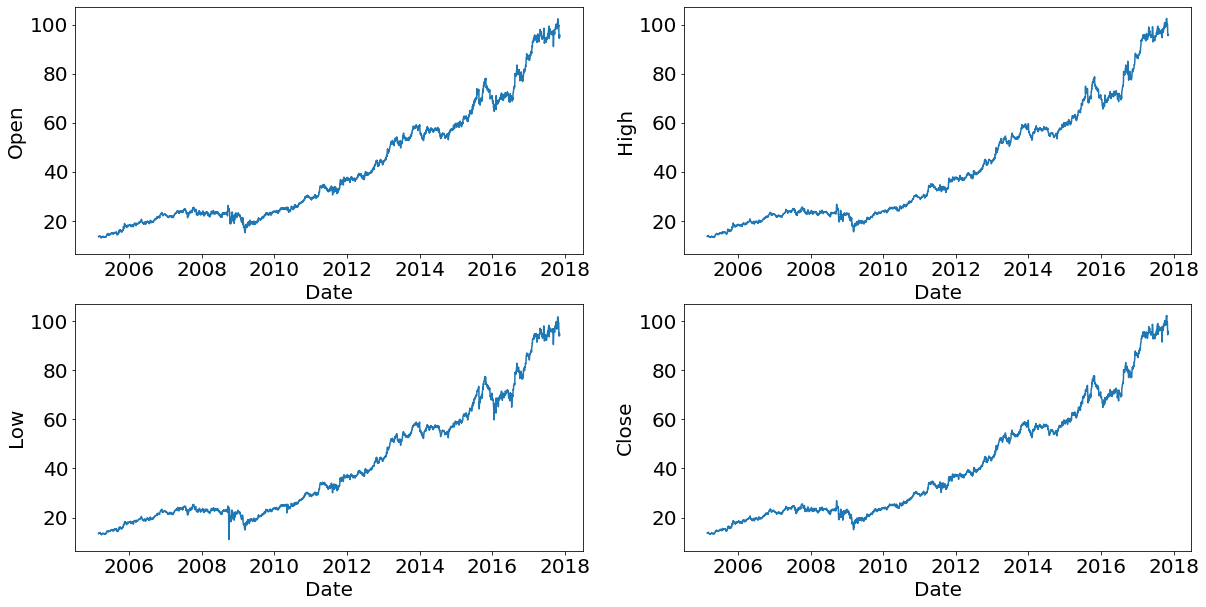

In [9]:
rcParams['figure.figsize'] = 20, 10
rcParams['font.size']=20
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1 = sns.lineplot(x="Date", y="Open",
                  markers=True, dashes=False, data=df)
ax2 = fig.add_subplot(222, sharex=ax1, sharey=ax1)
ax2 = sns.lineplot(x="Date", y="High",
                  markers=True, dashes=False, data=df)
ax3 = fig.add_subplot(223, sharex=ax1, sharey=ax1)
ax3 = sns.lineplot(x="Date", y="Low",
                  markers=True, dashes=False, data=df)
ax4 = fig.add_subplot(224, sharex=ax1, sharey=ax1)
ax4 = sns.lineplot(x="Date", y="Close",
                  markers=True, dashes=False, data=df)

In [10]:
df=df[['Date','Open','High','Low','Close']]
df=df.set_index('Date')

In [11]:
df.head(10)

,Open,High,Low,Close
Date,,,,
2005-02-25,13.583,13.693,13.430,13.693
2005-02-28,13.697,13.827,13.540,13.827
2005-03-01,13.780,13.913,13.720,13.760
2005-03-02,13.717,13.823,13.667,13.810
2005-03-03,13.783,13.783,13.587,13.630
2005-03-04,13.700,13.903,13.620,13.903
2005-03-07,13.917,14.053,13.897,13.987
2005-03-08,13.987,14.067,13.873,13.890
2005-03-09,13.930,13.960,13.813,13.817


In [12]:
df_close = df[['Close']]

In [13]:
df_close.head()

,Close
Date,
2005-02-25,13.693
2005-02-28,13.827
2005-03-01,13.760
2005-03-02,13.810
2005-03-03,13.630


In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
stocks = scaler.fit_transform(df_close)

In [15]:
print(stocks)

[[0.00575112]
 [0.00725336]
 [0.00650224]
 ...
 [0.92230942]
 [0.92746637]
 [0.92118834]]


In [16]:
train = int(len(stocks) * 0.80)
test = len(stocks) - train

In [17]:
print(train, test)

2560 641


In [18]:
train = stocks[0:train]
print(train)
type(train)

[[0.00575112]
 [0.00725336]
 [0.00650224]
 ...
 [0.53329596]
 [0.53643498]
 [0.53318386]]


numpy.ndarray

In [19]:
test = stocks[len(train) : ]

In [20]:
print(train.shape , test.shape)

(2560, 1) (641, 1)


# Done